In [1]:
import sys
import numpy as np
import logging
import warnings
import tqdm
warnings.filterwarnings("ignore", module="dynesty.sampling")
try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')

import matplotlib.pyplot as plt
import seaborn
import astropy.table as table

import snelib19odp.dataset as dataset
import snelib19odp.lc.observables as observables
import snelib19odp.dataset as dataset
import snelib19odp.tigerfit as tigerfit
import snelib19odp.utils as utils

model = np.vectorize(tigerfit.Lum_rad)

In [2]:
ds19odp = dataset.load_dataset('SN2019odp_phot')
ds13bvn = dataset.load_dataset('iPTF13bvn')
ds08d = dataset.load_dataset('SN2008D')
ds98bw = dataset.load_dataset('SN1998bw')

In [3]:
def plot_results(ds, r, time_range):
    plt.figure(figsize=(11,8))
    t_grid = np.linspace(ds.first_detection_mjd+time_range[0], ds.first_detection_mjd+time_range[1], 100)
    
    for i in range(10):
        lc = ds.sample_abs_lc(method='lyman', t_grid=t_grid)
        lums = utils.convert_luminosity(lc)
        plt.plot(t_grid - ds.transient.prior_t0, lums, label='Observed', color='tab:purple', alpha=0.3)
    for i in np.random.randint(0, 300, size=20):
        t = np.linspace(1e-3, 120, 100)
        lc = model(t, *r[i].params)
        plt.plot(t+r[i].texpl-ds.transient.prior_t0, np.exp(lc), color='tab:orange', alpha=0.1)
        
def plot_residuals(r):
    for i in np.random.randint(0, 300, size=90):
        plt.plot(r[i].t, np.exp(r[i].residual), color='tab:orange', alpha=0.1)

  0%|          | 0/300 [00:00<?, ?it/s]/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
100%|██████████| 300/300 [00:22<00:00, 13.25it/s]


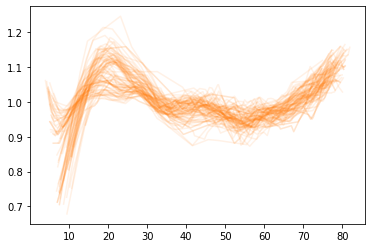

In [4]:
params19odp = {
    'texpl': ('samples', np.linspace(58712, 58716.38, 300)),
    'vej': ('uniform', 11e3, 12e3),
    'kappa': 0.05
}
time_range = (-14, 60)
fit19odp, results = tigerfit.sample(ds19odp, params19odp, return_results=True, time_range=time_range, time_format='peak')
#plot_results(ds19odp, results, time_range=time_range)
plot_residuals(results)

/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
100%|██████████| 300/300 [00:22<00:00, 13.05it/s]


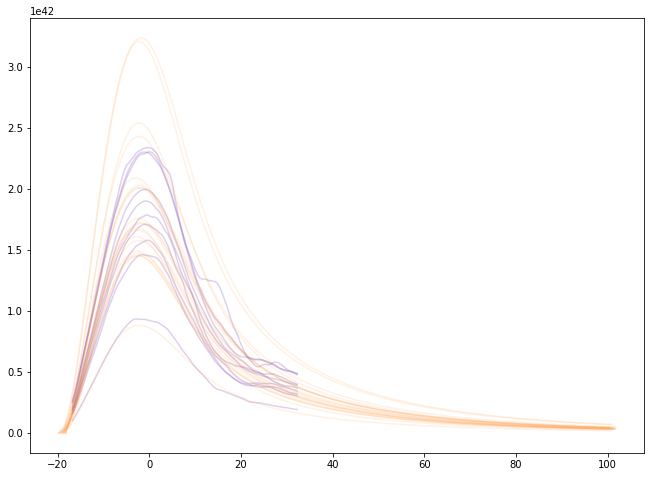

In [5]:
#print(ds13bvn.first_detection_mjd)
params13bvn = {
    #'texpl': ('samples', np.linspace(ds13bvn.first_detection_mjd-4, ds13bvn.first_detection_mjd-1, 300)),
    'texpl': ('samples', np.random.uniform(56458-1, 56459, size=300)),
    'vej': ('uniform', 9000, 11000),
    'kappa': 0.05
}
time_range = (1, 50)
fit13bvn, results = tigerfit.sample(ds13bvn, params13bvn, return_results=True, time_range=time_range)
plot_results(ds13bvn, results, time_range=time_range)
#plot_residuals(results)

/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
  0%|          | 1/300 [00:00<00:31,  9.41it/s]

54475.40567


100%|██████████| 300/300 [00:25<00:00, 11.83it/s]


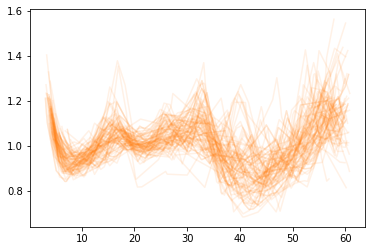

In [6]:
print(ds08d.first_detection_mjd)
params08d = {
    'texpl': ('samples', np.linspace(54474.5, ds08d.first_detection_mjd, 300)),
    'vej': ('uniform', 6000, 9000),
    'kappa': 0.05
}
time_range = (3, 60)
fit08d, results = tigerfit.sample(ds08d, params08d, return_results=True, time_range=time_range)
#plot_results(ds08d, results, time_range=time_range)
plot_residuals(results)

/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
100%|██████████| 300/300 [00:23<00:00, 12.95it/s]


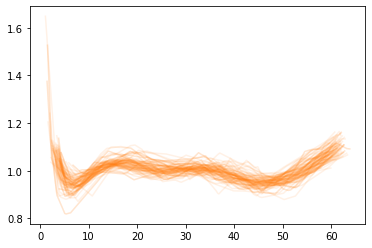

In [7]:
#print(ds13bvn.first_detection_mjd)
params98bw = {
    'texpl': ('samples', np.random.uniform(ds98bw.first_detection_mjd-4, ds98bw.first_detection_mjd-1, 300)),
    #'texpl': ('samples', np.random.uniform(56458-1, 56459, size=300))
    'vej': ('uniform', 29000, 31000),
    'kappa': 0.05
}
time_range = (0, 60)
fit98bw, results = tigerfit.sample(ds98bw, params98bw, return_results=True, time_range=time_range)
#plot_results(ds13bvn, results, time_range=time_range)
plot_residuals(results)

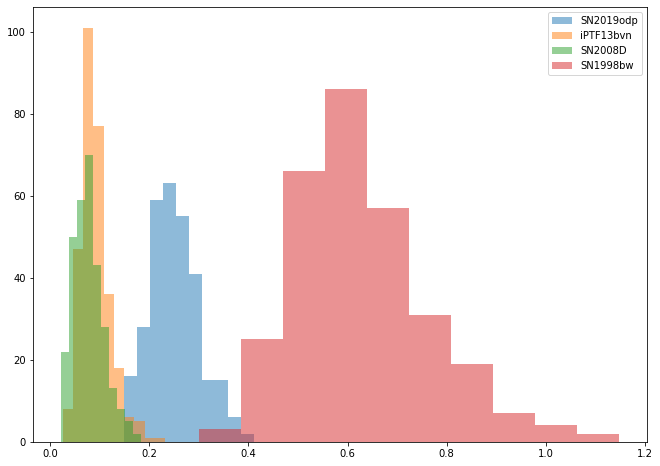

In [8]:
plt.figure(figsize=(11,8))
plt.hist(fit19odp['mni'], label='SN2019odp', alpha=0.5);
plt.hist(fit13bvn['mni'], label='iPTF13bvn', alpha=0.5)
plt.hist(fit08d['mni'], label='SN2008D', alpha=0.5)
plt.hist(fit98bw['mni'], label='SN1998bw', alpha=0.5)
plt.legend();

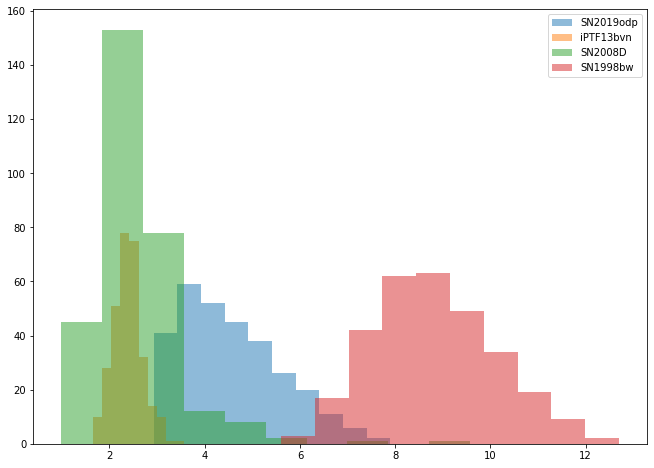

In [9]:
plt.figure(figsize=(11,8))
plt.hist(fit19odp['mejecta'], label='SN2019odp', alpha=0.5);
plt.hist(fit13bvn['mejecta'], label='iPTF13bvn', alpha=0.5)
plt.hist(fit08d['mejecta'], label='SN2008D', alpha=0.5)
plt.hist(fit98bw['mejecta'], label='SN1998bw', alpha=0.5)
plt.legend();

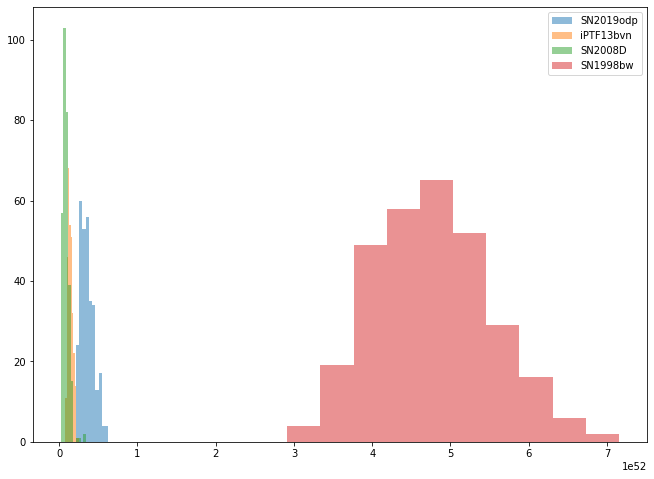

In [10]:
plt.figure(figsize=(11,8))
plt.hist(fit19odp['energy'], label='SN2019odp', alpha=0.5);
plt.hist(fit13bvn['energy'], label='iPTF13bvn', alpha=0.5)
plt.hist(fit08d['energy'], label='SN2008D', alpha=0.5)
plt.hist(fit98bw['energy'], label='SN1998bw', alpha=0.5)
plt.legend();

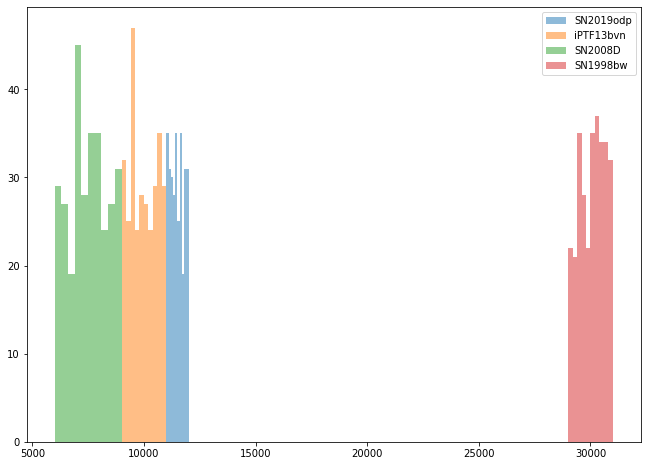

In [11]:
plt.figure(figsize=(11,8))
plt.hist(fit19odp['vejecta'], label='SN2019odp', alpha=0.5);
plt.hist(fit13bvn['vejecta'], label='iPTF13bvn', alpha=0.5)
plt.hist(fit08d['vejecta'], label='SN2008D', alpha=0.5)
plt.hist(fit98bw['vejecta'], label='SN1998bw', alpha=0.5)
plt.legend();

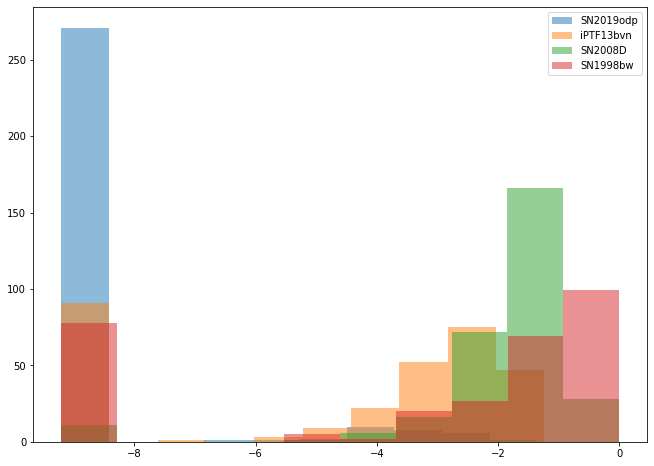

In [12]:
plt.figure(figsize=(11,8))
plt.hist(np.log(fit19odp['r0']), label='SN2019odp', alpha=0.5);
plt.hist(np.log(fit13bvn['r0']), label='iPTF13bvn', alpha=0.5)
plt.hist(np.log(fit08d['r0']), label='SN2008D', alpha=0.5)
plt.hist(np.log(fit98bw['r0']), label='SN1998bw', alpha=0.5)
plt.legend();

/home/welterde/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/welterde/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/welterde/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/

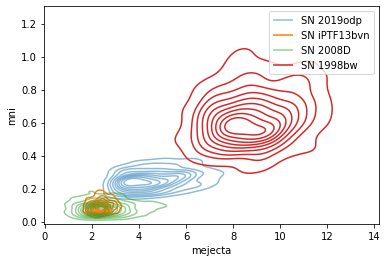

In [13]:
seaborn.kdeplot(fit19odp['mejecta'], fit19odp['mni'], label='SN 2019odp', alpha=0.5)
seaborn.kdeplot(fit13bvn['mejecta'], fit13bvn['mni'], label='SN iPTF13bvn')
seaborn.kdeplot(fit08d['mejecta'], fit08d['mni'], label='SN 2008D', alpha=0.5)
seaborn.kdeplot(fit98bw['mejecta'], fit98bw['mni'], label='SN 1998bw')

plt.legend()